# Customer Satisfaction Prediction Model

## Stage 1 - Objectives of Multiple Regression
* Predict Customer Satisfaction with the help of a Linear Model
* Identify the key factors that aid in improving customer satisfaction.

## Stage 2 - Research Design:
The Dataset comprises of 100 records with 13 independent variables and 1 dependent variable - Customer Satisfaction. The relationship among the dependent and independent variables is assumed to be statistical and not functional as it involves perception of performance that may include levels of measurement error.

The Sample of 100 observations meets the guideline for the minimum ratio of observations to independent variables (5:1) with an actual ration of almost 7:1

In [118]:
options(warn=-1)
library(ggplot2)
library(cowplot) #To combine Plots
library(dplyr)
library(car) # For regression diagnostics
library(ppcor) # For Partial Correlation

In [119]:
#Load Datasets
hbat <- read.csv("HBAT_MultipleRegression.csv",header = TRUE)

#check dimesions ( number of row & columns) in data sets
dim(hbat)

#check the variables and their types in train
str(hbat)

[1] 100  14

'data.frame':	100 obs. of  14 variables:
 $ X6 : num  8.5 8.2 9.2 6.4 9 6.5 6.9 6.2 5.8 6.4 ...
 $ X7 : num  3.9 2.7 3.4 3.3 3.4 2.8 3.7 3.3 3.6 4.5 ...
 $ X8 : num  2.5 5.1 5.6 7 5.2 3.1 5 3.9 5.1 5.1 ...
 $ X9 : num  5.9 7.2 5.6 3.7 4.6 4.1 2.6 4.8 6.7 6.1 ...
 $ X10: num  4.8 3.4 5.4 4.7 2.2 4 2.1 4.6 3.7 4.7 ...
 $ X11: num  4.9 7.9 7.4 4.7 6 4.3 2.3 3.6 5.9 5.7 ...
 $ X12: num  6 3.1 5.8 4.5 4.5 3.7 5.4 5.1 5.8 5.7 ...
 $ X13: num  6.8 5.3 4.5 8.8 6.8 8.5 8.9 6.9 9.3 8.4 ...
 $ X14: num  4.7 5.5 6.2 7 6.1 5.1 4.8 5.4 5.9 5.4 ...
 $ X15: num  4.3 4 4.6 3.6 4.5 9.5 2.5 4.8 4.4 5.3 ...
 $ X16: num  5 3.9 5.4 4.3 4.5 3.6 2.1 4.3 4.4 4.1 ...
 $ X17: num  5.1 4.3 4 4.1 3.5 4.7 4.2 6.3 6.1 5.8 ...
 $ X18: num  3.7 4.9 4.5 3 3.5 3.3 2 3.7 4.6 4.4 ...
 $ X19: num  8.2 5.7 8.9 4.8 7.1 4.7 5.7 6.3 7 5.5 ...


## Stage 3 : Assumptions of individual Variable
1. Verify Linearity - Scatter Plots of dependent variable with the independent variable
2. Verify Heteroscedasticity - Using ncvTest() and SpreadLevelPlots
3. Verify Normality

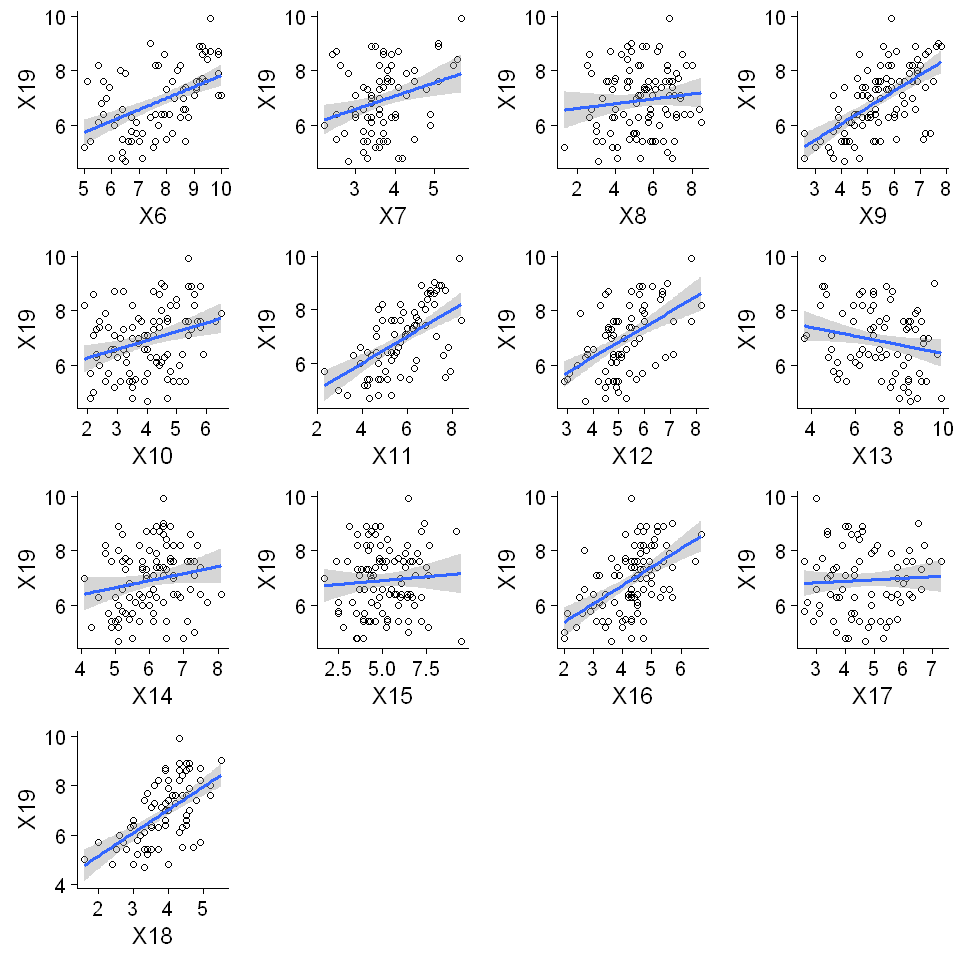

In [120]:
#Verify Linearity - Scatter Plots of dependent variable with the independent variable
options(repr.plot.width=8, repr.plot.height=8)

plot1 <- ggplot(hbat,aes(X6,X19)) +
  geom_point(shape =1 )+
  geom_smooth(method=lm)

plot2 <- ggplot(hbat,aes(X7,X19)) +
  geom_point(shape =1 )+
  geom_smooth(method=lm)

plot3 <- ggplot(hbat,aes(X8,X19)) +
  geom_point(shape =1 )+
  geom_smooth(method=lm)

plot4 <- ggplot(hbat,aes(X9,X19)) +
  geom_point(shape =1 )+
  geom_smooth(method=lm)

plot5 <- ggplot(hbat,aes(X10,X19)) +
  geom_point(shape =1 )+
  geom_smooth(method=lm)

plot6 <- ggplot(hbat,aes(X11,X19)) +
  geom_point(shape =1 )+
  geom_smooth(method=lm)

plot7 <- ggplot(hbat,aes(X12,X19)) +
  geom_point(shape =1 )+
  geom_smooth(method=lm)

plot8 <- ggplot(hbat,aes(X13,X19)) +
  geom_point(shape =1 )+
  geom_smooth(method=lm)

plot9 <- ggplot(hbat,aes(X14,X19)) +
  geom_point(shape =1 )+
  geom_smooth(method=lm)

plot10 <- ggplot(hbat,aes(X15,X19)) +
  geom_point(shape =1 )+
  geom_smooth(method=lm)

plot11 <- ggplot(hbat,aes(X16,X19)) +
  geom_point(shape =1 )+
  geom_smooth(method=lm)

plot12 <- ggplot(hbat,aes(X17,X19)) +
  geom_point(shape =1 )+
  geom_smooth(method=lm)

plot13 <- ggplot(hbat,aes(X18,X19)) +
  geom_point(shape =1 )+
  geom_smooth(method=lm)

plot_grid(plot1, plot2, plot3 , plot4 , plot5 , plot6 , plot7 , plot8, plot9, plot10 , plot11, plot12, plot13 ,align='h')

Scatterplots do not indicate any non-linear relationship. Although for variables X8 & X15, the relationship seems to be weak

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 1.948484    Df = 1     p = 0.1627503 

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.1026906    Df = 1     p = 0.7486244 

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.4442569    Df = 1     p = 0.5050749 

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 3.112149    Df = 1     p = 0.07771039 

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.01342084    Df = 1     p = 0.9077727 

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 6.62176    Df = 1     p = 0.01007402 

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.7232177    Df = 1     p = 0.3950905 

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.008987823    Df = 1     p = 0.9244704 

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.005544316    Df = 1     p = 0.9406442 

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.344965    Df = 1     p = 0.5569773 

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.236057    Df = 1     p = 0.6270686 

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 1.679434    Df = 1     p = 0.1949997 

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 4.397248    Df = 1     p = 0.03599698 

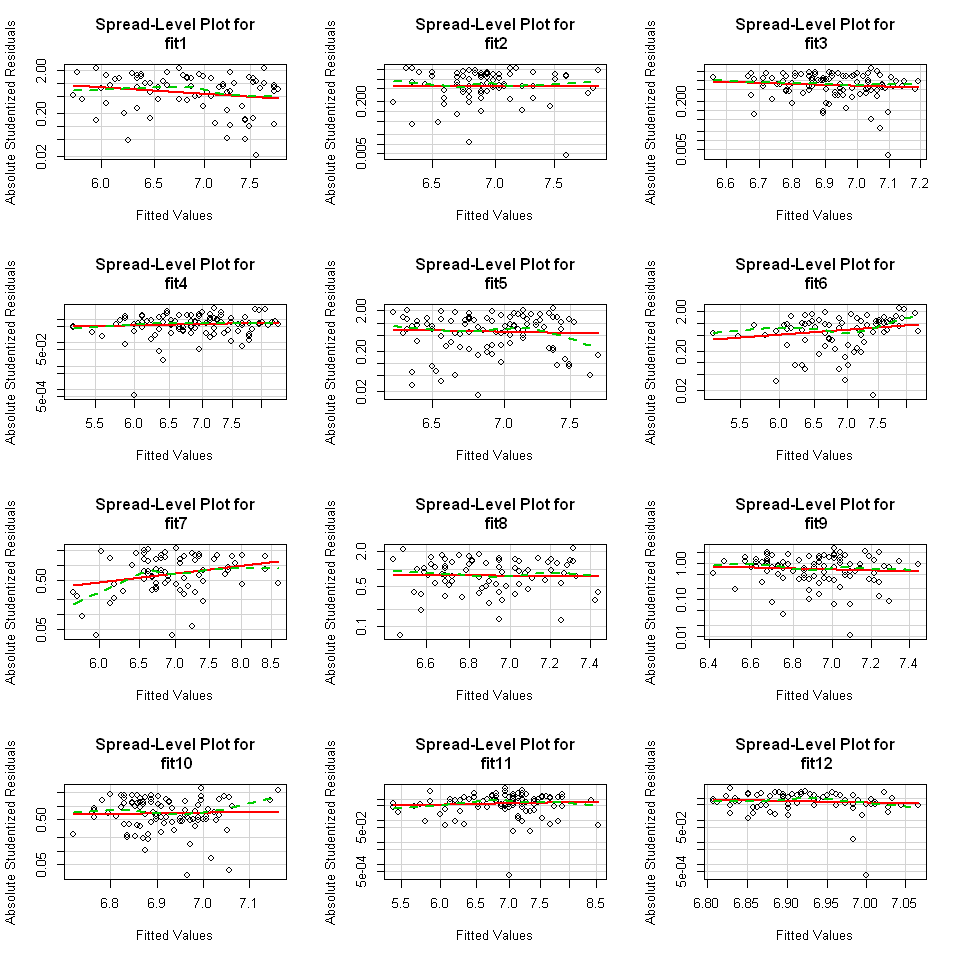

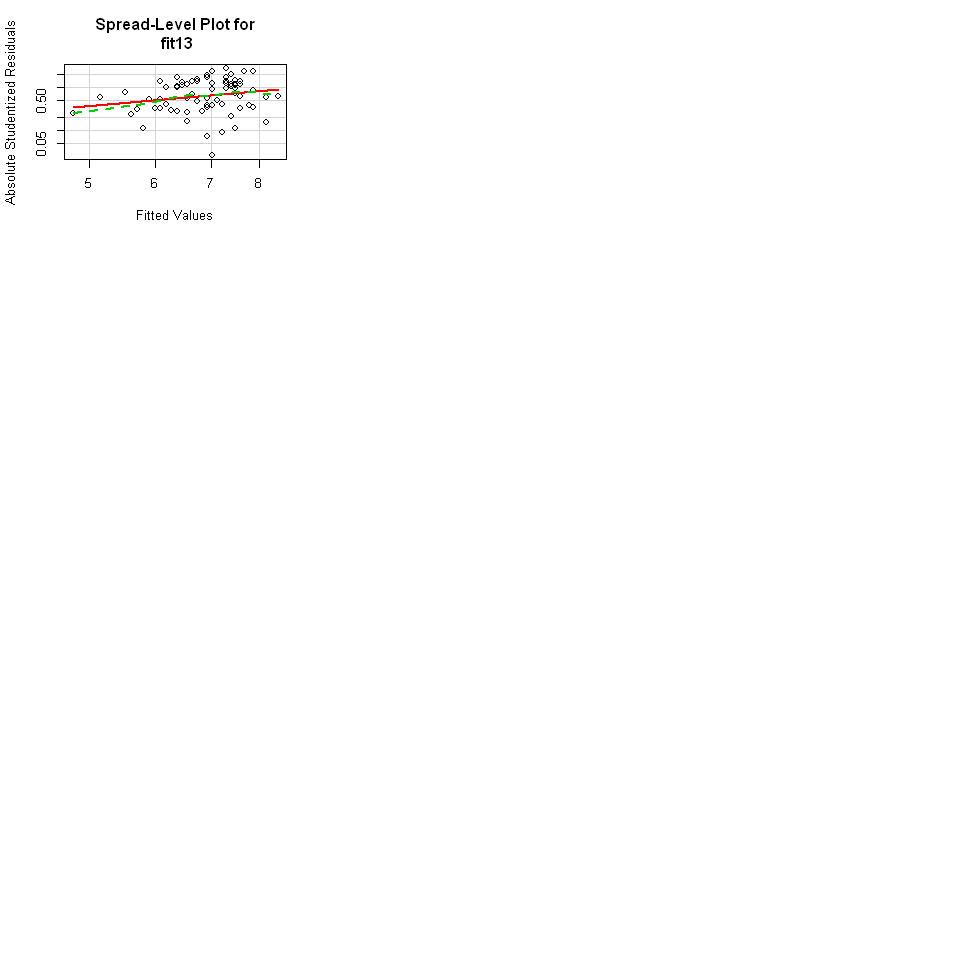

In [121]:
# Verify Homoscedasticity - Using ncvTest() and SpreadLevelPlots
options(repr.plot.width=8, repr.plot.height= 8)
par(mfrow = c(4,3))

fit1 <- lm(X19 ~ X6,hbat)
fit2 <- lm(X19 ~ X7,hbat)
fit3 <- lm(X19 ~ X8,hbat)
fit4 <- lm(X19 ~ X9,hbat)
fit5 <- lm(X19 ~ X10,hbat)
fit6 <- lm(X19 ~ X11,hbat)
fit7 <- lm(X19 ~ X12,hbat)
fit8 <- lm(X19 ~ X13,hbat)
fit9 <- lm(X19 ~ X14,hbat)
fit10 <- lm(X19 ~ X15,hbat)
fit11 <- lm(X19 ~ X16,hbat)
fit12 <- lm(X19 ~ X17,hbat)
fit13 <- lm(X19 ~ X18,hbat)

ncvTest(fit1)
ncvTest(fit2)
ncvTest(fit3)
ncvTest(fit4)
ncvTest(fit5)
ncvTest(fit6)
ncvTest(fit7)
ncvTest(fit8)
ncvTest(fit9)
ncvTest(fit10)
ncvTest(fit11)
ncvTest(fit12)
ncvTest(fit13)

plot1 <- spreadLevelPlot(fit1) 
plot2 <- spreadLevelPlot(fit2) 
plot3 <- spreadLevelPlot(fit3) 
plot4 <- spreadLevelPlot(fit4) 
plot5 <- spreadLevelPlot(fit5) 
plot6 <- spreadLevelPlot(fit6) 
plot7 <- spreadLevelPlot(fit7) 
plot8 <- spreadLevelPlot(fit8) 
plot9 <- spreadLevelPlot(fit9) 
plot10 <- spreadLevelPlot(fit10) 
plot11 <- spreadLevelPlot(fit11) 
plot12 <- spreadLevelPlot(fit12) 
plot13 <- spreadLevelPlot(fit13) 

#plot_grid(plot1, plot2, plot3 , plot4 , plot5 , plot6 , plot7 , plot8, plot9, plot10 , plot11, plot12, plot13 ,align='v')

In the 6th and 13th plot there are minimal violations of the Heteroscedasticity assumption. But no major corrective actions are needed


	Shapiro-Wilk normality test

data:  hbat$X6
W = 0.94972, p-value = 0.0007953



	Shapiro-Wilk normality test

data:  hbat$X7
W = 0.95852, p-value = 0.003157



	Shapiro-Wilk normality test

data:  hbat$X8
W = 0.98626, p-value = 0.39



	Shapiro-Wilk normality test

data:  hbat$X9
W = 0.98646, p-value = 0.4023



	Shapiro-Wilk normality test

data:  hbat$X10
W = 0.97626, p-value = 0.06769



	Shapiro-Wilk normality test

data:  hbat$X11
W = 0.98692, p-value = 0.4324



	Shapiro-Wilk normality test

data:  hbat$X12
W = 0.97403, p-value = 0.04534



	Shapiro-Wilk normality test

data:  hbat$X13
W = 0.96758, p-value = 0.01448



	Shapiro-Wilk normality test

data:  hbat$X14
W = 0.99094, p-value = 0.7404



	Shapiro-Wilk normality test

data:  hbat$X15
W = 0.98598, p-value = 0.3728



	Shapiro-Wilk normality test

data:  hbat$X16
W = 0.97405, p-value = 0.04549



	Shapiro-Wilk normality test

data:  hbat$X17
W = 0.96546, p-value = 0.01004



	Shapiro-Wilk normality test

data:  hbat$X18
W = 0.98161, p-value = 0.177



	Shapiro-Wilk normality test

data:  hbat$X19
W = 0.97516, p-value = 0.05556


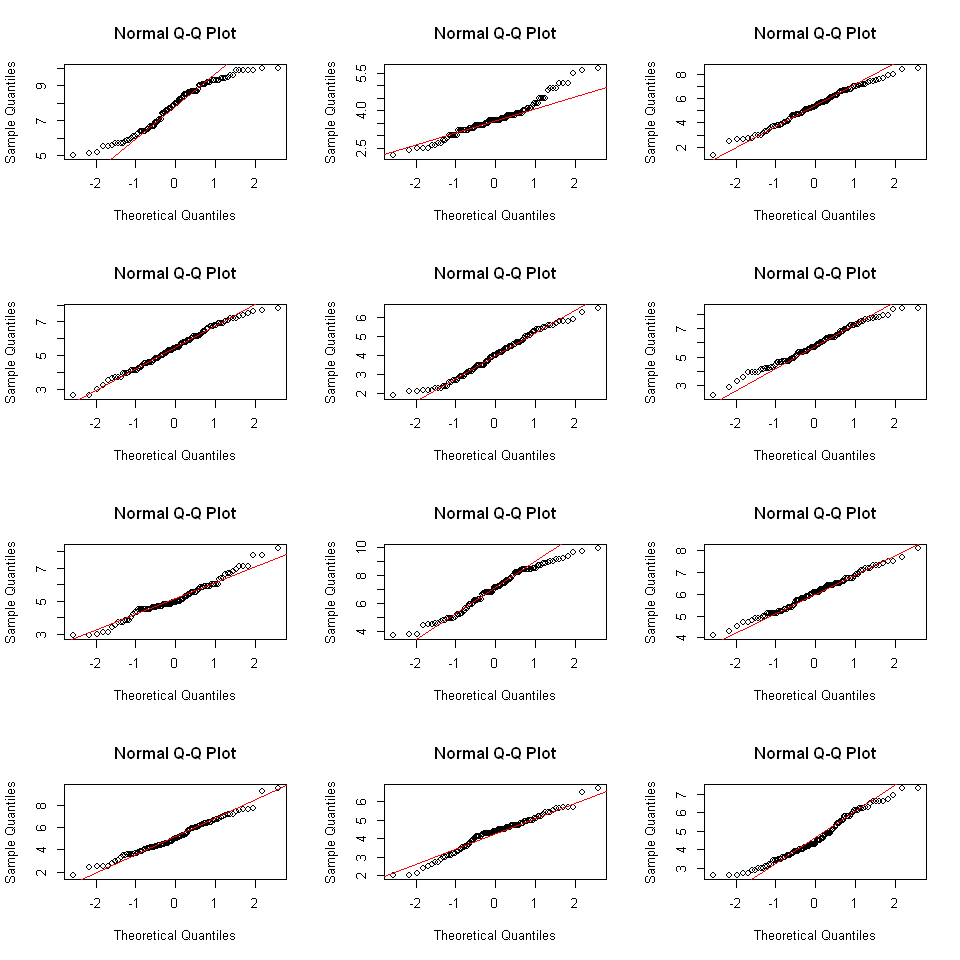

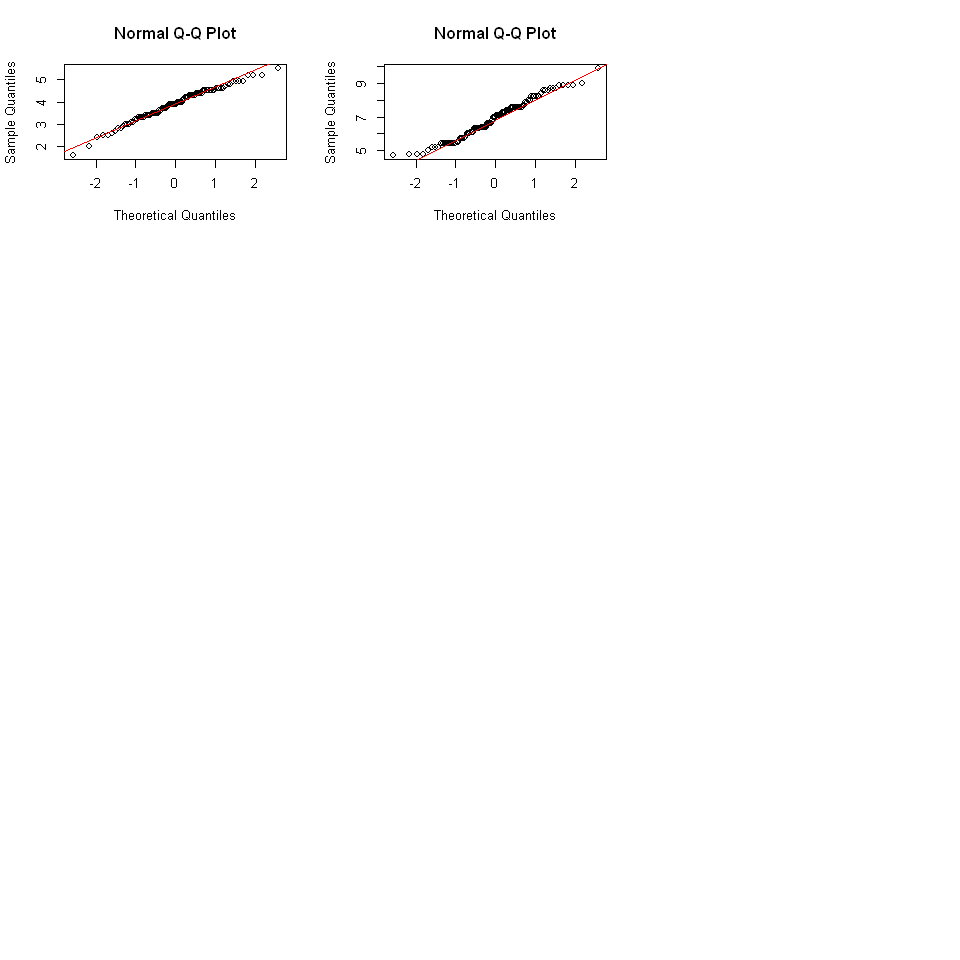

In [122]:
# Verify Normality Assumption
options(repr.plot.width=8, repr.plot.height= 8)
par(mfrow = c(4,3))

#Statistical Test for Normality:
shapiro.test(hbat$X6)
shapiro.test(hbat$X7)
shapiro.test(hbat$X8)
shapiro.test(hbat$X9)
shapiro.test(hbat$X10)
shapiro.test(hbat$X11)
shapiro.test(hbat$X12)
shapiro.test(hbat$X13)
shapiro.test(hbat$X14)
shapiro.test(hbat$X15)
shapiro.test(hbat$X16)
shapiro.test(hbat$X17)
shapiro.test(hbat$X18)
shapiro.test(hbat$X19)

#Graphical Plots for Normality
qqnorm(hbat$X6);qqline(hbat$X6,col = 2) 
qqnorm(hbat$X7);qqline(hbat$X7,col = 2) 
qqnorm(hbat$X8);qqline(hbat$X8,col = 2) 
qqnorm(hbat$X9);qqline(hbat$X9,col = 2) 
qqnorm(hbat$X10);qqline(hbat$X10,col = 2) 
qqnorm(hbat$X11);qqline(hbat$X11,col = 2) 
qqnorm(hbat$X12);qqline(hbat$X12,col = 2) 
qqnorm(hbat$X13);qqline(hbat$X13,col = 2) 
qqnorm(hbat$X14);qqline(hbat$X14,col = 2) 
qqnorm(hbat$X15);qqline(hbat$X15,col = 2) 
qqnorm(hbat$X16);qqline(hbat$X16,col = 2) 
qqnorm(hbat$X17);qqline(hbat$X17,col = 2) 
qqnorm(hbat$X18);qqline(hbat$X18,col = 2) 
qqnorm(hbat$X19);qqline(hbat$X19,col = 2) 




The Normality Assumptions Test returned the results that:
* Normal Variables: X8,X9,X10,X11,X14,X15,X18,X19
* Not Normal Variables: X6,X7,X12,X13,X16,X17

In [123]:
##Transforming the Non-Normal Variables: 
#To identify the power transformation required we use the powerTransform() from the car package

summary(powerTransform(hbat$X6))
shapiro.test((hbat$X6)^1.5) ##Not Transformed 

summary(powerTransform(hbat$X7))
shapiro.test((hbat$X7)^(0.1)) ##Transformed successfully

bcPower Transformation to Normality 
        Est Power Rounded Pwr Wald Lwr bnd Wald Upr Bnd
hbat$X6    1.5534           1       0.3574       2.7494

Likelihood ratio tests about transformation parameters
                            LRT df       pval
LR test, lambda = (0) 6.7299210  1 0.00948088
LR test, lambda = (1) 0.8344222  1 0.36099691


	Shapiro-Wilk normality test

data:  (hbat$X6)^1.5
W = 0.95218, p-value = 0.001159


bcPower Transformation to Normality 
        Est Power Rounded Pwr Wald Lwr bnd Wald Upr Bnd
hbat$X7   -0.0438           0      -0.8581       0.7706

Likelihood ratio tests about transformation parameters
                           LRT df       pval
LR test, lambda = (0) 0.011089  1 0.91613434
LR test, lambda = (1) 6.251074  1 0.01241181


	Shapiro-Wilk normality test

data:  (hbat$X7)^(0.1)
W = 0.98025, p-value = 0.1391


In [124]:
#Correlation Matrix:
cor(hbat)

,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
X6,1.00000000,-0.1371632174,0.0956004542,0.10637000,-0.05347313,0.47749341,-0.15181287,-0.40128188,0.08831231,0.02698820,0.10430307,-0.49313812,0.02771800,0.48632500
X7,-0.13716322,1.0000000000,0.0008667887,0.14017926,0.42989071,-0.05268784,0.79154371,0.22946240,0.05189819,-0.02742781,0.15614733,0.27066742,0.19163607,0.28274501
X8,0.09560045,0.0008667887,1.0000000000,0.09665660,-0.06287007,0.19262546,0.01699054,-0.27078668,0.79716793,-0.07357899,0.08010182,-0.18609639,0.02544069,0.11259718
X9,0.10637000,0.1401792611,0.0966565978,1.00000000,0.19691685,0.56141695,0.22975176,-0.12795425,0.14040830,0.05940111,0.75686859,0.39450634,0.86509170,0.60326260
X10,-0.05347313,0.4298907110,-0.0628700668,0.19691685,1.00000000,-0.01155082,0.54220366,0.13421689,0.01079207,0.08416610,0.18423559,0.33355482,0.27586308,0.30466947
X11,0.47749341,-0.0526878383,0.1926254565,0.56141695,-0.01155082,1.00000000,-0.06131553,-0.49494840,0.27307753,0.04616424,0.42440825,-0.37796681,0.60185021,0.55054594
X12,-0.15181287,0.7915437115,0.0169905395,0.22975176,0.54220366,-0.06131553,1.00000000,0.26459655,0.10745534,0.03164009,0.19512741,0.35224073,0.27155126,0.50020531
X13,-0.40128188,0.2294624014,-0.2707866821,-0.12795425,0.13421689,-0.49494840,0.26459655,1.00000000,-0.24498605,0.02316342,-0.11456703,0.47110961,-0.07287173,-0.20829569
X14,0.08831231,0.0518981915,0.7971679258,0.14040830,0.01079207,0.27307753,0.10745534,-0.24498605,1.00000000,0.03519937,0.19706512,-0.17025280,0.10939460,0.17754482
X15,0.02698820,-0.0274278083,-0.0735789868,0.05940111,0.08416610,0.04616424,0.03164009,0.02316342,0.03519937,1.00000000,0.06853933,0.09413139,0.10574950,0.07089830


Variable X9 has the maximum correlation, so we begin the model creation with X9

## Stage 4: Estimating Regression Model and assessing overall model fit.
This stage includes:

4.1 Select method for specifying the Regression Model. This can be done using:
* Stepwise Regression
* Forward Selection - Backward Elimination

4.2 Examine the statistical significance of the model by checking:
* anova(fit) and F-Statistic 
* Coefficient of determination - R2  & Adjusted  R2
* Residual Standard Error /Standard error of estimate (Se)
* Statistical significance of the estimated parameters using t-test

4.3 Test the Regression Variable for meeting regression assumptions.
* Use residual plots to test the assumptions of: linearity, homoscedasticity, independence and normality.
* Perform Enhanced Regression diagnostics using the car package
* Run the omnibus test gvlma(fit) that performs a global validation of linear model assumptions 

4.4 Identify the Influential Observations:

### Stage 4.1 - 4.2 Using Stepwise Regression

In [125]:
fit <- lm(X19 ~ X9, hbat)
summary(fit)


Call:
lm(formula = X19 ~ X9, data = hbat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.40450 -0.66164  0.04499  0.63037  2.70949 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.68005    0.44285   8.310 5.51e-13 ***
X9           0.59499    0.07946   7.488 3.09e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9554 on 98 degrees of freedom
Multiple R-squared:  0.3639,	Adjusted R-squared:  0.3574 
F-statistic: 56.07 on 1 and 98 DF,  p-value: 3.085e-11


### Assessing Model Fit:

#### Validating Model Fit:
* Multiple R It is the correlation co-efficient of the regression variate with the dependent variable. In this case it is only X9. Since it is a simple regression, Multiple R is the same as the bivartiate correlation (0.603) from correlation matrix
* R Square: It is the correlation co-efficient squared = (0.603^2) = 0.3639 [Multiple R-Suared in Summary]
* Adjusted R Square: It is the correlation co-efficient squared = 0.3574 [Multiple R-Suared in Summary]
* Standard Error of Estimate: 0.9554 [ Residual Standard Error in Summary]
* Anova & F-Ratio: 56.07 [F-statistic in Summary] with significance level of 0

#### Observation for Model Fit:
Regression model is valid [ F-ratio is significant ] and it explains 37% of the variation in Y with a standard deviation of prediction errors = 0.9554. We should keep the model.

#### Validating Individal variable Fit:

###### Variable: X9
* Regression Coefficient b = 0.595
* Std. Error of Coeeficient = 0.079
* t-value = 7.483 [ Significant ]

###### Intercept:
* Regression Coefficient b = 3.68
* Std. Error of Coeeficient = 0.442
* t-value = 8.310 [ Significant ]

##### Observation for Individual Variables:
Individual variable and intercept are significant. We should keep the model

### Adding a second variable to the Model:
We check the partial correlation of all the other variables given X9 is already in the model and then pick the variable with the highest Partial correlation coefficient
              

In [126]:
pcor.test(hbat$X6,hbat$X19,hbat[,c("X9")])
pcor.test(hbat$X7,hbat$X19,hbat[,c("X9")])
pcor.test(hbat$X8,hbat$X19,hbat[,c("X9")])
pcor.test(hbat$X10,hbat$X19,hbat[,c("X9")])
pcor.test(hbat$X11,hbat$X19,hbat[,c("X9")])
pcor.test(hbat$X12,hbat$X19,hbat[,c("X9")])
pcor.test(hbat$X13,hbat$X19,hbat[,c("X9")])
pcor.test(hbat$X14,hbat$X19,hbat[,c("X9")])
pcor.test(hbat$X15,hbat$X19,hbat[,c("X9")])
pcor.test(hbat$X16,hbat$X19,hbat[,c("X9")])
pcor.test(hbat$X17,hbat$X19,hbat[,c("X9")])
pcor.test(hbat$X18,hbat$X19,hbat[,c("X9")])

estimate,p.value,statistic,n,gp,Method
0.532341,1.419316e-08,6.193462,100,1,pearson


estimate,p.value,statistic,n,gp,Method
0.2509664,0.01222408,2.553454,100,1,pearson


estimate,p.value,statistic,n,gp,Method
0.06838914,0.5011958,0.6751356,100,1,pearson


estimate,p.value,statistic,n,gp,Method
0.2377165,0.01782279,2.410329,100,1,pearson


estimate,p.value,statistic,n,gp,Method
0.3210096,0.001196848,3.338252,100,1,pearson


estimate,p.value,statistic,n,gp,Method
0.4658607,1.178435e-06,5.185233,100,1,pearson


estimate,p.value,statistic,n,gp,Method
-0.1657495,0.1010876,-1.65534,100,1,pearson


estimate,p.value,statistic,n,gp,Method
0.1175745,0.2464484,1.166062,100,1,pearson


estimate,p.value,statistic,n,gp,Method
0.04404261,0.6651142,0.4341907,100,1,pearson


estimate,p.value,statistic,n,gp,Method
0.1249721,0.2177614,1.240558,100,1,pearson


estimate,p.value,statistic,n,gp,Method
-0.2483955,0.01317141,-2.525567,100,1,pearson


estimate,p.value,statistic,n,gp,Method
0.1378919,0.173484,1.371176,100,1,pearson


The Partial Correlation coefficient is 
* Significant for both X6 & X12 
* Higest for variable X6  . 
* Correspondingly, the correlation between variable X6 and X9 is lower than between X12 & X9 from the correlation matrix. 

We select variable X6 to add in the Regression Model

In [127]:
fit <- lm(X19 ~ X9+X6,hbat)
summary(fit)
'VIF Values for the Variables:'
vif(fit)


Call:
lm(formula = X19 ~ X9 + X6, data = hbat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4374 -0.3696  0.1116  0.5727  2.0776 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.07733    0.56443   1.909   0.0593 .  
X9           0.55020    0.06800   8.092 1.71e-12 ***
X6           0.36447    0.05885   6.193 1.42e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8129 on 97 degrees of freedom
Multiple R-squared:  0.5442,	Adjusted R-squared:  0.5348 
F-statistic:  57.9 on 2 and 97 DF,  p-value: < 2.2e-16


[1] "VIF Values for the Variables:"

X9       X6 
1.011444 1.011444

### Assessing Model Fit:

#### Validating Model Fit:
* R Square: It is the correlation co-efficient squared = 0.544 [Multiple R-Suared in Summary]
* Adjusted R Square: It is the correlation co-efficient squared = 0.535 [Multiple R-Suared in Summary]
* Standard Error of Estimate: 0.8129 [ Residual Standard Error in Summary]
* Anova & F-Ratio: 57.9 [F-statistic in Summary] with significance level of 0

#### Observation for Model Fit:
* Regression model is valid [ F-ratio is significant ] and it explains 53.5% of the variation in Y with a standard deviation of prediction errors = 0.8129.
* Since the adjusted Rsquare went up, and the residual standard error went down, we should keep this model

#### Validating Individal variable Fit:

###### Variable: X9
* Regression Coefficient b = 0.55
* Std. Error of Coeeficient = 0.068
* t-value = 8.092 [ Significant ]

###### Variable: X6
* Regression Coefficient b = 0.364
* Std. Error of Coeeficient = 0.0588
* t-value = 6.193 [ Significant ]

###### Intercept:
* Regression Coefficient b = 1.077
* Std. Error of Coeeficient = 0.564
* t-value = 1.903 [ Significant ]

#### Observation for Variable Fit:
* The Regression coefficients of the old variable X9 did not change significantly, thus multicollinearity with X9 is minimal.
* All the individual variables are significant 

### Adding Third variable to the model:
We check the partial coreelation coefficients for remaining variables given that X6 and X9 are already in the model.

In [128]:
pcor.test(hbat$X7,hbat$X19,hbat[,c("X9","X6")])
pcor.test(hbat$X8,hbat$X19,hbat[,c("X9","X6")])
pcor.test(hbat$X10,hbat$X19,hbat[,c("X9","X6")])
pcor.test(hbat$X11,hbat$X19,hbat[,c("X9","X6")])
pcor.test(hbat$X12,hbat$X19,hbat[,c("X9","X6")])
pcor.test(hbat$X13,hbat$X19,hbat[,c("X9","X6")])
pcor.test(hbat$X14,hbat$X19,hbat[,c("X9","X6")])
pcor.test(hbat$X15,hbat$X19,hbat[,c("X9","X6")])
pcor.test(hbat$X16,hbat$X19,hbat[,c("X9","X6")])
pcor.test(hbat$X17,hbat$X19,hbat[,c("X9","X6")])

estimate,p.value,statistic,n,gp,Method
0.398383,4.850768e-05,4.255624,100,2,pearson


estimate,p.value,statistic,n,gp,Method
0.02667397,0.7943106,0.2614435,100,2,pearson


estimate,p.value,statistic,n,gp,Method
0.3297807,0.0009129823,3.422649,100,2,pearson


estimate,p.value,statistic,n,gp,Method
0.06955528,0.4961548,0.6831543,100,2,pearson


estimate,p.value,statistic,n,gp,Method
0.6761592,2.175504e-14,8.9921,100,2,pearson


estimate,p.value,statistic,n,gp,Method
0.0559134,0.5844883,0.5486955,100,2,pearson


estimate,p.value,statistic,n,gp,Method
0.09227577,0.3661582,0.9079881,100,2,pearson


estimate,p.value,statistic,n,gp,Method
0.03894022,0.7034356,0.3818243,100,2,pearson


estimate,p.value,statistic,n,gp,Method
0.1246865,0.2212252,1.231282,100,2,pearson


estimate,p.value,statistic,n,gp,Method
0.09235845,0.3657271,0.9088087,100,2,pearson


The Partial Correlation coefficient is 
* Significant for both X7 & X12 
* Estimate Higest for variable X12  . 

We select variable X12 to add in the Regression Model

In [129]:
fit <- lm(X19 ~ X9+X6+X12,hbat)
summary(fit)
"VIF of the Independent Variables"
vif(fit)


Call:
lm(formula = X19 ~ X9 + X6 + X12, data = hbat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.50032 -0.32103  0.08287  0.35695  1.26481 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.56899    0.51122  -3.069  0.00279 ** 
X9           0.43318    0.05201   8.329 5.70e-13 ***
X6           0.43706    0.04432   9.861 2.96e-16 ***
X12          0.53020    0.05896   8.992 2.18e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.602 on 96 degrees of freedom
Multiple R-squared:  0.7526,	Adjusted R-squared:  0.7448 
F-statistic: 97.33 on 3 and 96 DF,  p-value: < 2.2e-16


[1] "VIF of the Independent Variables"

X9       X6      X12 
1.078991 1.046146 1.091949

### Assessing Model Fit:

#### Validating Model Fit:
* R Square: It is the correlation co-efficient squared = 0.7526 [Multiple R-Suared in Summary]
* Adjusted R Square: It is the correlation co-efficient squared = 0.7448 [Multiple R-Suared in Summary]
* Standard Error of Estimate: 0.602 [ Residual Standard Error in Summary]
* Anova & F-Ratio: 97.33 [F-statistic in Summary] with significance level of 0

#### Observation for Model Fit:
* Regression model is valid [ F-ratio is significant ] and it explains 74.5.5% of the variation in Y with a standard deviation of prediction errors = 0.602.
* Since the adjusted Rsquare went up, and the residual standard error went down, we should keep this model

#### Validating Individal variable Fit:

###### Variable: X9
* Regression Coefficient b = 0.433
* Std. Error of Coeeficient = 0.052
* t-value = 8.328 [ Significant ]

###### Variable: X6
* Regression Coefficient b = 0.437
* Std. Error of Coeeficient = 0.044
* t-value = 9.861 [ Significant ]

###### Variable: X12
* Regression Coefficient b = 0.53
* Std. Error of Coeeficient = 0.058
* t-value = 8.992 [ Significant ]

#### Observation for Variable Fit:
* The Regression coefficients of the old variable X9 & X6  did not change significantly, thus multicollinearity with X9 is minimal.
* All the individual variables are significant 

### Adding Third variable to the model:
We check the partial coreelation coefficients for remaining variables given that X6 X9 & X12 are already in the model.

In [130]:
pcor.test(hbat$X7,hbat$X19,hbat[,c("X9","X6","X12")])
pcor.test(hbat$X8,hbat$X19,hbat[,c("X9","X6","X12")])
pcor.test(hbat$X10,hbat$X19,hbat[,c("X9","X6","X12")])
pcor.test(hbat$X11,hbat$X19,hbat[,c("X9","X6","X12")])
pcor.test(hbat$X13,hbat$X19,hbat[,c("X9","X6","X12")])
pcor.test(hbat$X14,hbat$X19,hbat[,c("X9","X6","X12")])
pcor.test(hbat$X15,hbat$X19,hbat[,c("X9","X6","X12")])
pcor.test(hbat$X16,hbat$X19,hbat[,c("X9","X6","X12")])
pcor.test(hbat$X17,hbat$X19,hbat[,c("X9","X6","X12")])
pcor.test(hbat$X18,hbat$X19,hbat[,c("X9","X6","X12")])

estimate,p.value,statistic,n,gp,Method
-0.2842569,0.004775954,-2.889803,100,3,pearson


estimate,p.value,statistic,n,gp,Method
0.02654137,0.7963615,0.2587844,100,3,pearson


estimate,p.value,statistic,n,gp,Method
-0.03143693,0.7598486,-0.3065608,100,3,pearson


estimate,p.value,statistic,n,gp,Method
0.2538982,0.01209171,2.558534,100,3,pearson


estimate,p.value,statistic,n,gp,Method
-0.1662185,0.1036987,-1.642953,100,3,pearson


estimate,p.value,statistic,n,gp,Method
0.03967477,0.6996169,0.3870066,100,3,pearson


estimate,p.value,statistic,n,gp,Method
0.03203166,0.7554468,0.3123663,100,3,pearson


estimate,p.value,statistic,n,gp,Method
0.1319374,0.1976671,1.297307,100,3,pearson


estimate,p.value,statistic,n,gp,Method
-0.09116517,0.3744954,-0.8922839,100,3,pearson


estimate,p.value,statistic,n,gp,Method
0.2174857,0.03236262,2.171773,100,3,pearson


The Partial Correlation coefficient is 
* Significant for both X7 X11 & X18 
* Estimate Higest for variable X7 [ We take absolute value]  . 

We select variable X7 to add in the Regression Model

In [131]:
fit <- lm(X19 ~ X9+X6+X12+X7,hbat)
summary(fit)
"VIF for variables:"
vif(fit)


Call:
lm(formula = X19 ~ X9 + X6 + X12 + X7, data = hbat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4246 -0.3704  0.1135  0.3760  1.0827 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.10570    0.51813  -2.134  0.03541 *  
X9           0.42350    0.05024   8.430 3.72e-13 ***
X6           0.43482    0.04272  10.177  < 2e-16 ***
X12          0.73635    0.09121   8.074 2.11e-12 ***
X7          -0.39468    0.13658  -2.890  0.00478 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5802 on 95 degrees of freedom
Multiple R-squared:  0.7726,	Adjusted R-squared:  0.763 
F-statistic: 80.68 on 4 and 95 DF,  p-value: < 2.2e-16


[1] "VIF for variables:"

X9       X6      X12       X7 
1.083812 1.046488 2.812762 2.691768

#### Observations:
* Model accuracy has increased to 76.3% and the Std. Error has reduced to 0.58. So we keep the model
* Individual parameters are also significant
* Variable X12 estimate & Std. error has increased significantly since the last model. It's VIF is also pretty high. Thus indicating multicollinearity issues with other variables.

### Selecting the next variable to be added to the Model:

In [132]:
pcor.test(hbat$X8,hbat$X19,hbat[,c("X9","X6","X12","X7")])
pcor.test(hbat$X10,hbat$X19,hbat[,c("X9","X6","X12","X7")])
pcor.test(hbat$X11,hbat$X19,hbat[,c("X9","X6","X12","X7")])
pcor.test(hbat$X13,hbat$X19,hbat[,c("X9","X6","X12","X7")])
pcor.test(hbat$X14,hbat$X19,hbat[,c("X9","X6","X12","X7")])
pcor.test(hbat$X15,hbat$X19,hbat[,c("X9","X6","X12","X7")])
pcor.test(hbat$X16,hbat$X19,hbat[,c("X9","X6","X12","X7")])
pcor.test(hbat$X17,hbat$X19,hbat[,c("X9","X6","X12","X7")])
pcor.test(hbat$X18,hbat$X19,hbat[,c("X9","X6","X12","X7")])

estimate,p.value,statistic,n,gp,Method
0.02398172,0.8165946,0.2325783,100,4,pearson


estimate,p.value,statistic,n,gp,Method
-0.0304072,0.7686862,-0.2949451,100,4,pearson


estimate,p.value,statistic,n,gp,Method
0.2829665,0.005213927,2.860366,100,4,pearson


estimate,p.value,statistic,n,gp,Method
-0.1689935,0.09977151,-1.662362,100,4,pearson


estimate,p.value,statistic,n,gp,Method
0.02801025,0.7864669,0.271676,100,4,pearson


estimate,p.value,statistic,n,gp,Method
0.009109325,0.9298088,0.08832184,100,4,pearson


estimate,p.value,statistic,n,gp,Method
0.1630391,0.1124755,1.60216,100,4,pearson


estimate,p.value,statistic,n,gp,Method
-0.09497678,0.3573264,-0.9250156,100,4,pearson


estimate,p.value,statistic,n,gp,Method
0.2382966,0.01938604,2.378902,100,4,pearson


The only significant variable is X11, so we add it to the model

In [133]:
fit <- lm(X19 ~ X9+X6+X12+X7+X11,hbat)
summary(fit)
"VIF for variables:"
vif(fit)


Call:
lm(formula = X19 ~ X9 + X6 + X12 + X7 + X11, data = hbat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.40116 -0.30067  0.05776  0.41636  0.91403 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.15106    0.49984  -2.303  0.02349 *  
X9           0.31896    0.06068   5.256 9.16e-07 ***
X6           0.36900    0.04719   7.820 7.61e-12 ***
X12          0.77513    0.08898   8.711 1.01e-13 ***
X7          -0.41714    0.13192  -3.162  0.00211 ** 
X11          0.17435    0.06095   2.860  0.00521 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5595 on 94 degrees of freedom
Multiple R-squared:  0.7908,	Adjusted R-squared:  0.7797 
F-statistic: 71.06 on 5 and 94 DF,  p-value: < 2.2e-16


[1] "VIF for variables:"

X9       X6      X12       X7      X11 
1.700653 1.373046 2.879601 2.701333 2.033015

#### Observations:
* The model is significant and explains 78% of the variation in Y. The residual error also decreased for the model
* All individual variables are significant along with the intercept.
* Variable 12 is still increasing in estimate, and its VIF has also gobe above the last model indicating multicollinearity.

### Selecting the next variable to add in the model:

In [134]:
pcor.test(hbat$X8,hbat$X19,hbat[,c("X9","X6","X12","X7","X11")])
pcor.test(hbat$X10,hbat$X19,hbat[,c("X9","X6","X12","X7","X11")])
pcor.test(hbat$X13,hbat$X19,hbat[,c("X9","X6","X12","X7","X11")])
pcor.test(hbat$X14,hbat$X19,hbat[,c("X9","X6","X12","X7","X11")])
pcor.test(hbat$X15,hbat$X19,hbat[,c("X9","X6","X12","X7","X11")])
pcor.test(hbat$X16,hbat$X19,hbat[,c("X9","X6","X12","X7","X11")])
pcor.test(hbat$X17,hbat$X19,hbat[,c("X9","X6","X12","X7","X11")])
pcor.test(hbat$X18,hbat$X19,hbat[,c("X9","X6","X12","X7","X11")])

estimate,p.value,statistic,n,gp,Method
-0.01937732,0.8521437,-0.1869032,100,5,pearson


estimate,p.value,statistic,n,gp,Method
-0.01676159,0.8719199,-0.1616657,100,5,pearson


estimate,p.value,statistic,n,gp,Method
-0.07086648,0.4949634,-0.6851342,100,5,pearson


estimate,p.value,statistic,n,gp,Method
-0.0478969,0.6448519,-0.4624317,100,5,pearson


estimate,p.value,statistic,n,gp,Method
0.005163602,0.9603912,0.04979664,100,5,pearson


estimate,p.value,statistic,n,gp,Method
0.1762551,0.08752812,1.726776,100,5,pearson


estimate,p.value,statistic,n,gp,Method
0.1465998,0.1562976,1.429199,100,5,pearson


estimate,p.value,statistic,n,gp,Method
0.133447,0.1973159,1.29853,100,5,pearson


None of the variables have a significant partial correlation. Hence we stop adding variables to the model.
Our final model as per the Stepwise selection comprises of the variables: X9 X6 X12 X7 X11

### Stage 4.1 - 4.2: Using Forward Selection - Backward Elimination technique for Model Building

In [135]:
#Null Model
noModel <- lm(X19 ~ 1,data = hbat)

#Full Model
RegModelFull = lm(X19 ~ ., data = hbat)

#Stepwise - Forward selection backward elimination
RegModelStepwise <- step(noModel, list(lower = formula(noModel),
                                         upper = formula(RegModelFull)),
                           direction = "both",trace = 0)

In [136]:

summary(RegModelStepwise)


Call:
lm(formula = X19 ~ X9 + X6 + X12 + X7 + X11 + X16, data = hbat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.40616 -0.32428  0.03067  0.38672  0.97362 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.26902    0.49935  -2.541  0.01270 *  
X9           0.22577    0.08074   2.796  0.00628 ** 
X6           0.36499    0.04676   7.806 8.59e-12 ***
X12          0.78167    0.08814   8.869 5.06e-14 ***
X7          -0.43635    0.13103  -3.330  0.00125 ** 
X11          0.17655    0.06034   2.926  0.00431 ** 
X16          0.15911    0.09215   1.727  0.08753 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5537 on 93 degrees of freedom
Multiple R-squared:  0.7973,	Adjusted R-squared:  0.7842 
F-statistic: 60.96 on 6 and 93 DF,  p-value: < 2.2e-16


In [137]:
#Running Model Comparison
anova(fit,RegModelStepwise)
AIC(fit,RegModelStepwise)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
94,29.42211,NA,NA,NA,NA
93,28.50808,1,0.914023,2.981756,0.08752812


,df,AIC
fit,7,175.4453
RegModelStepwise,8,174.2895


We discard this model, even though we do see an increase in predictive accuracy becuase:
* The Anova Test for Model comparison returns the test to be insignificant
* The AIC decreases ever so slightly for the second model.
* All the variables are same as the earlier model except for variable X16 which is not statistically significant at 95% significance level. 

### Stage 4.3 - Test the regression variate for meeting the Regression Assumptions

**Evaluating Linearity:**
Linearity will be assesed through:
* Analysis of residuals (testing the overal variate) - Top Left Plot 
* Partial regression plots ( for each independent variable in the analysis)

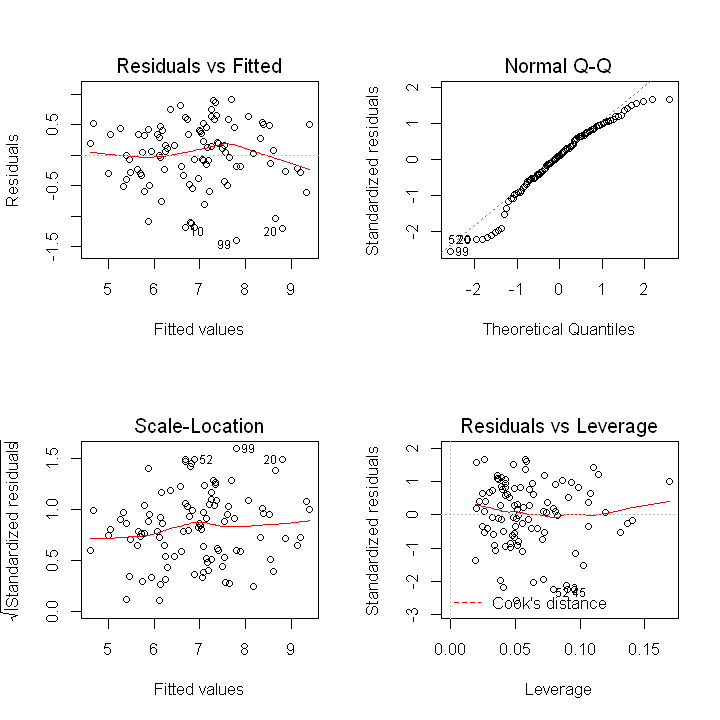

In [138]:
# Analysis of the Residuals:
options(repr.plot.width=6, repr.plot.height=6)
par(mfrow = c(2,2))
plot(fit)

For the Linearity Assumption, we check the Residuals versus Fitted plot (upper left).
* If the dependent variable is linearly related to the independent variables, there should be no systematic relationship between the residuals and the predicted (that is, fitted) values. In other words, the model should capture all the systematic variance present in the data, leaving nothing but random noise. 
* Our plot also does not exhibit any non-linear pattern to the residuals thus ensuring that the overall regression variate in linear.

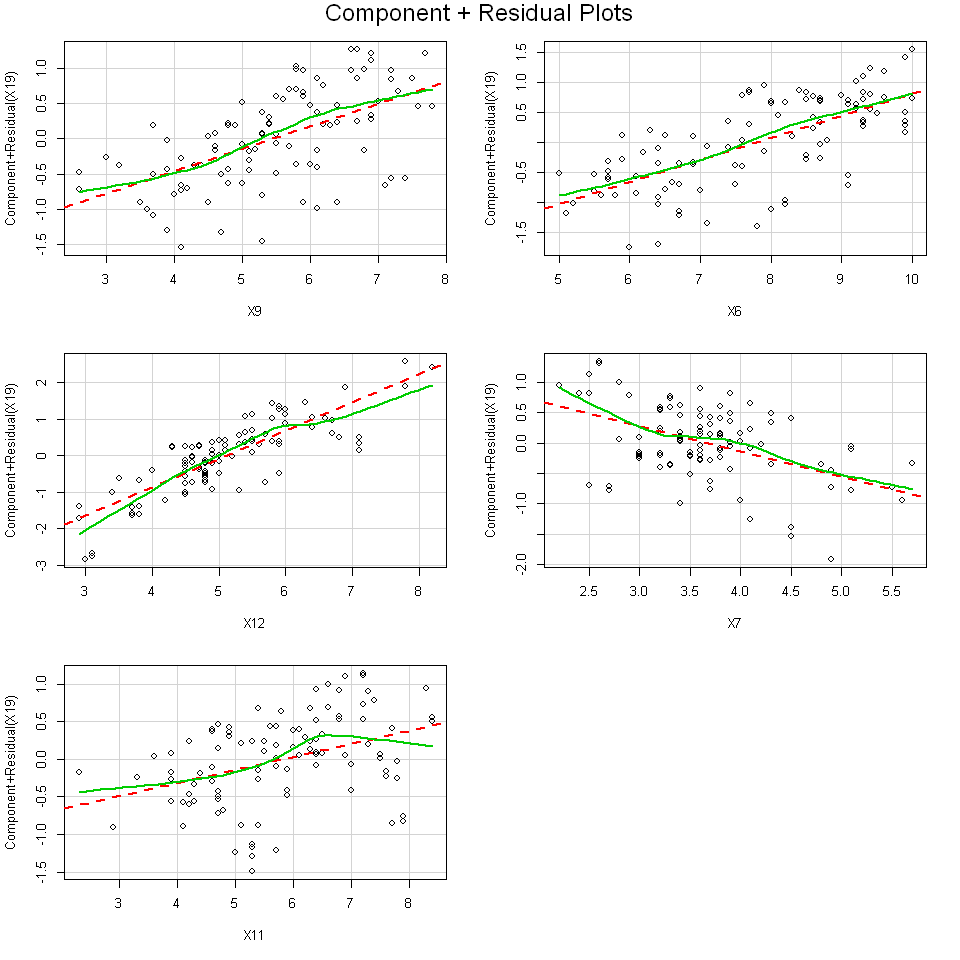

In [139]:
#Partial Residual Plots
options(repr.plot.width=8, repr.plot.height=8)
crPlots(fit)

For the Partial Regression Plots, we see that the relationships for X6, X9, and X12 are reasonably well defined i.e. they have a strong a significant relationship in the regression equation. Varaibles X7 and X11 are less well defined both in slope and scatter of the points.

Note: For Variable X6, X9,X12 the slope is steeper as the slope is from greater than -1 to greater than 1. While for X7 and X11 Slope is from -0.5 to 0.5

** Evaluating Homoscedasticity ** 
* Analysis of the Residuals Scale Location Plot (Bottom Left)
* ncvTest()
* spreadLevelPlot()

In [140]:
ncvTest(fit)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 1.851037    Df = 1     p = 0.1736628 


Suggested power transformation:  0.3802335 

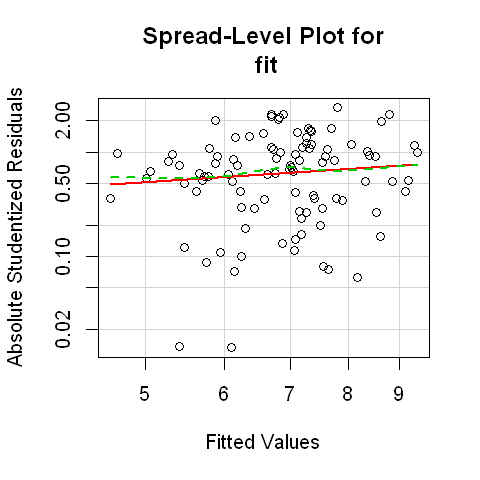

In [141]:
options(repr.plot.width=4, repr.plot.height=4)
spreadLevelPlot(fit)

There is no evidence of increasing or decreasing pattern of studentized residuals in any of the three tests. Thus indicating Homoscedasticity

** Evaluating Independence of Residuals **
* durbinWatsonTest()

In [142]:
durbinWatsonTest(fit)

 lag Autocorrelation D-W Statistic p-value
   1      -0.2285794      2.448884   0.026
 Alternative hypothesis: rho != 0

There seems to be evidence of Autocorrelation of the errors according to the test. 

** Evaluating Normality **
* Analysis of Residuals - Normal Q-Q Plot ( Top Right )
* qqPlot()
* Shaprio.test()

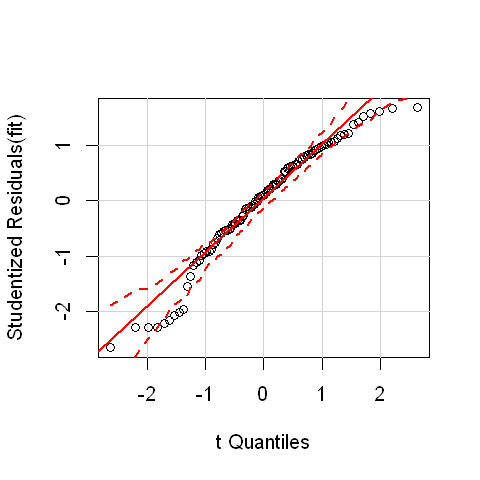

In [143]:
options(repr.plot.width=4, repr.plot.height=4)
qqPlot(fit)

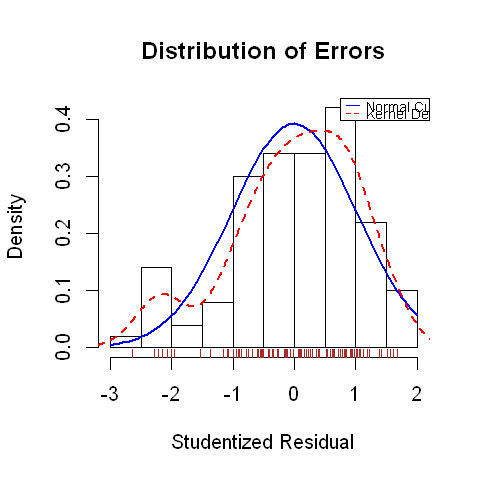

In [144]:
residplot <- function(fit, nbreaks=10) {
    z <- rstudent(fit)
    hist(z, breaks=nbreaks, freq=FALSE,
    xlab="Studentized Residual",
    main="Distribution of Errors")
    rug(jitter(z), col="brown")
    curve(dnorm(x, mean=mean(z), sd=sd(z)),
    add=TRUE, col="blue", lwd=2)
    lines(density(z)$x, density(z)$y,
    col="red", lwd=2, lty=2)
    legend("topright",
    legend = c( "Normal Curve", "Kernel Density Curve"),
    lty=1:2, col=c("blue","red"), cex=.7)
    }
residplot(fit)

In [145]:
# Validating the Normality of the Residuals:
shapiro.test(rstudent(fit)) 

#Validating the Normality of the individual variables in the Regression
shapiro.test(hbat$X6) 
shapiro.test(hbat$X7) 
shapiro.test(hbat$X9) 
shapiro.test(hbat$X11) 
shapiro.test(hbat$X12)
shapiro.test(hbat$X19)


	Shapiro-Wilk normality test

data:  rstudent(fit)
W = 0.95554, p-value = 0.001958



	Shapiro-Wilk normality test

data:  hbat$X6
W = 0.94972, p-value = 0.0007953



	Shapiro-Wilk normality test

data:  hbat$X7
W = 0.95852, p-value = 0.003157



	Shapiro-Wilk normality test

data:  hbat$X9
W = 0.98646, p-value = 0.4023



	Shapiro-Wilk normality test

data:  hbat$X11
W = 0.98692, p-value = 0.4324



	Shapiro-Wilk normality test

data:  hbat$X12
W = 0.97403, p-value = 0.04534



	Shapiro-Wilk normality test

data:  hbat$X19
W = 0.97516, p-value = 0.05556


Clearly the regression variate does not seem to meet the Normality assumption fully. Even though the Linear Regression Model is robust when the Normality assumption is not met, we try to remedy the issue.

The variables that are not Normal are X6 and X7. We identify the Power Transformation required and apply transformations to test again in the Shapiro Test.

In [146]:
summary(powerTransform(hbat$X6))
summary(powerTransform(hbat$X7))

bcPower Transformation to Normality 
        Est Power Rounded Pwr Wald Lwr bnd Wald Upr Bnd
hbat$X6    1.5534           1       0.3574       2.7494

Likelihood ratio tests about transformation parameters
                            LRT df       pval
LR test, lambda = (0) 6.7299210  1 0.00948088
LR test, lambda = (1) 0.8344222  1 0.36099691

bcPower Transformation to Normality 
        Est Power Rounded Pwr Wald Lwr bnd Wald Upr Bnd
hbat$X7   -0.0438           0      -0.8581       0.7706

Likelihood ratio tests about transformation parameters
                           LRT df       pval
LR test, lambda = (0) 0.011089  1 0.91613434
LR test, lambda = (1) 6.251074  1 0.01241181

In [147]:
shapiro.test((hbat$X6)^1.5534) 
shapiro.test((hbat$X7)^(-0.0438)) 


	Shapiro-Wilk normality test

data:  (hbat$X6)^1.5534
W = 0.95231, p-value = 0.001182



	Shapiro-Wilk normality test

data:  (hbat$X7)^(-0.0438)
W = 0.98077, p-value = 0.1527


In [148]:
fit_transformed <- lm(X19 ~ X9 + X6^2 + X12 + log(X7) + X11, data = hbat)
summary(fit_transformed)


Call:
lm(formula = X19 ~ X9 + X6^2 + X12 + log(X7) + X11, data = hbat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.44014 -0.29482  0.07185  0.43088  0.94658 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.64678    0.57304  -1.129  0.26191    
X9           0.31222    0.06102   5.116 1.64e-06 ***
X6           0.36777    0.04729   7.778 9.32e-12 ***
X12          0.76860    0.08835   8.700 1.06e-13 ***
log(X7)     -1.51189    0.48648  -3.108  0.00249 ** 
X11          0.17155    0.06101   2.812  0.00600 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5604 on 94 degrees of freedom
Multiple R-squared:  0.7901,	Adjusted R-squared:  0.7789 
F-statistic: 70.76 on 5 and 94 DF,  p-value: < 2.2e-16


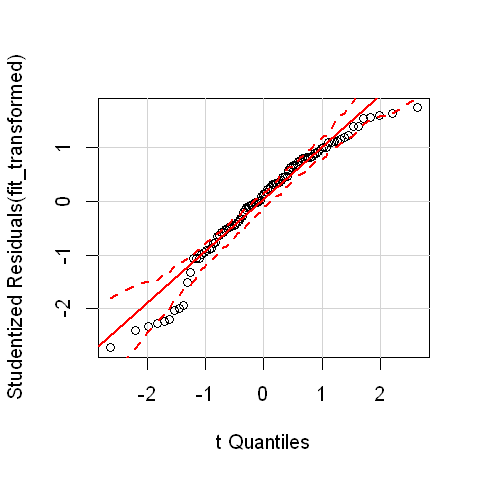

In [149]:
qqPlot(fit_transformed)

There is only a slight improvement in the Normality of the Residuals. Which means that the transformations are not quite effective.

### Global Validation of linear model assumption using the gvlma() package:
The gvlma() function performs a global validation of linear model assumptions as well as separate evaluations of skewness, kurtosis, and heteroscedasticity. In other words, it provides a single omnibus (go/no go) test of model assumptions.

In [150]:
library(gvlma)
gvmodel <- gvlma(fit)
summary(gvmodel)


Call:
lm(formula = X19 ~ X9 + X6 + X12 + X7 + X11, data = hbat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.40116 -0.30067  0.05776  0.41636  0.91403 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.15106    0.49984  -2.303  0.02349 *  
X9           0.31896    0.06068   5.256 9.16e-07 ***
X6           0.36900    0.04719   7.820 7.61e-12 ***
X12          0.77513    0.08898   8.711 1.01e-13 ***
X7          -0.41714    0.13192  -3.162  0.00211 ** 
X11          0.17435    0.06095   2.860  0.00521 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5595 on 94 degrees of freedom
Multiple R-squared:  0.7908,	Adjusted R-squared:  0.7797 
F-statistic: 71.06 on 5 and 94 DF,  p-value: < 2.2e-16


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = fit) 

                    Value p-value                   Decisio

The Omnibus test clearly indicates that Normality assumption is violated, while all the other assumptions are sufficiently met.

** Identifying Outliers **

In [151]:
# To find the biggest Outlier:
outlierTest(fit)


No Studentized residuals with Bonferonni p < 0.05
Largest |rstudent|:
    rstudent unadjusted p-value Bonferonni p
99 -2.652142          0.0094041      0.94041

integer(0)

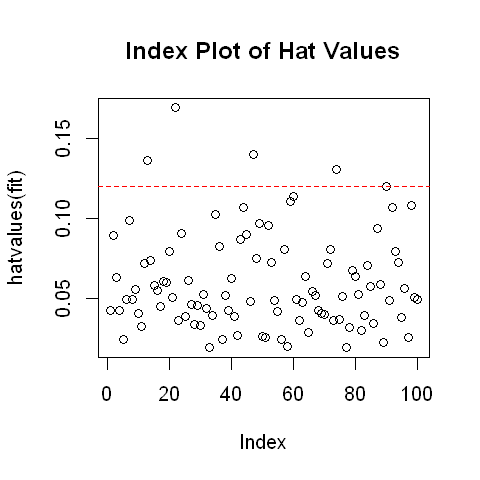

In [152]:
#To find the Leverage Points. The below code is interactive and does not work fully in Jupyter Notebook
hat.plot <- function(fit) {
    p <- length(coefficients(fit))
    n <- length(fitted(fit))
    plot(hatvalues(fit), main="Index Plot of Hat Values")
    abline(h=c(2,3)*p/n, col="red", lty=2)
    identify(1:n, hatvalues(fit), names(hatvalues(fit)))
    }
hat.plot(fit)

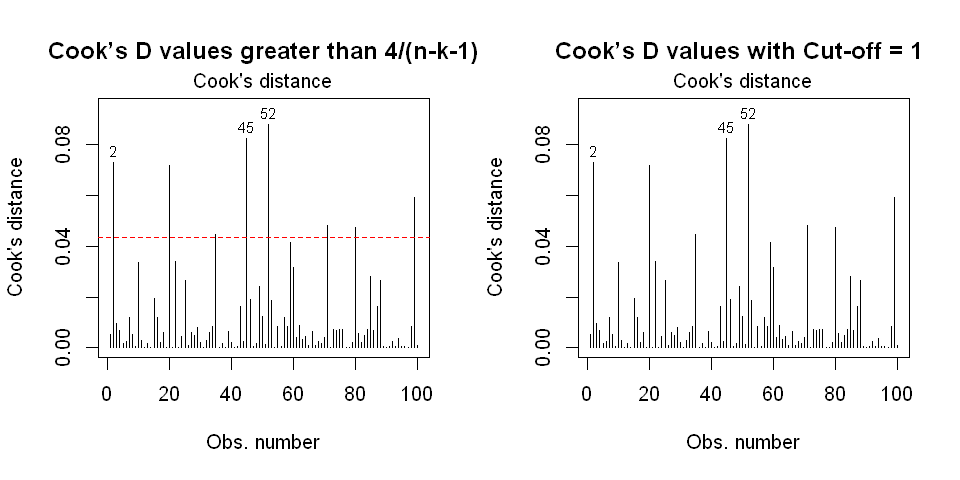

In [153]:
# Finding Influential Points using Cook's Distance:
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow = c(1,2))

cutoff <- 4/(nrow(hbat)-length(fit$coefficients)-2)
plot(fit, which=4, cook.levels=cutoff)
abline(h=cutoff, lty=2, col="red")
title("Cook’s D values greater than 4/(n-k-1)")

plot(fit, which=4, cook.levels=1)
abline(h=1, lty=2, col="red")
title("Cook’s D values with Cut-off = 1 ")

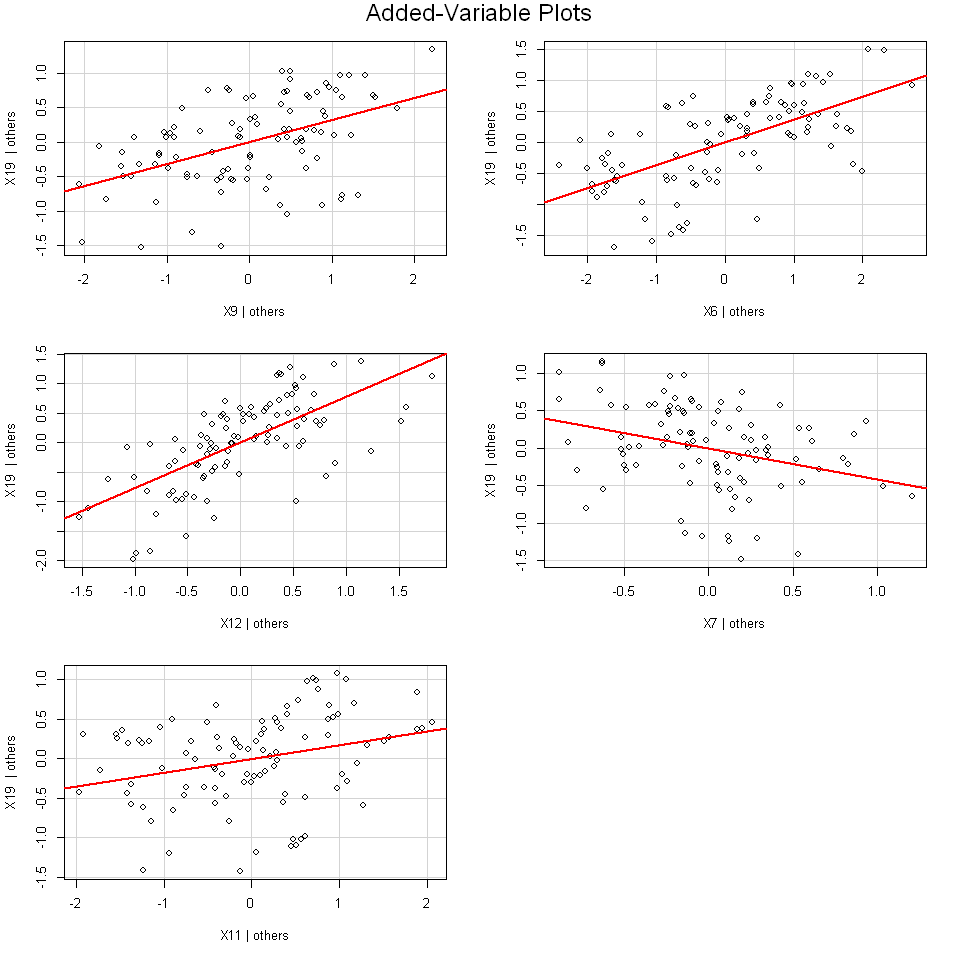

In [154]:
options(repr.plot.width=8, repr.plot.height=8)
avPlots(fit, ask=FALSE, onepage=TRUE, id.method="identify")

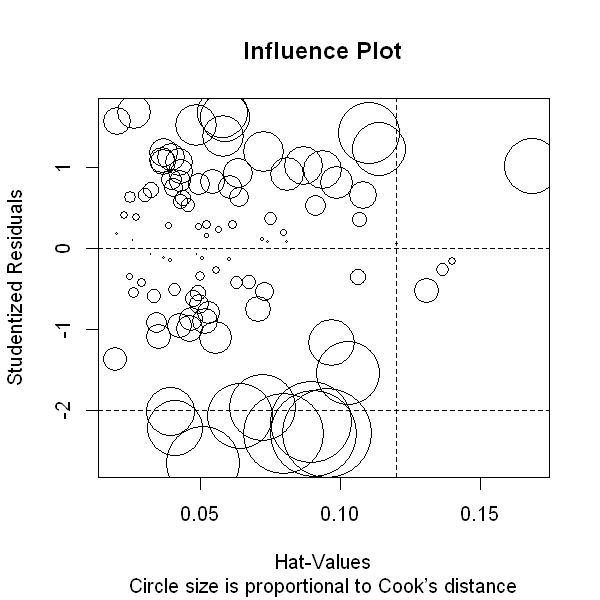

In [155]:
options(repr.plot.width=5, repr.plot.height=5)
influencePlot(fit, id.method="identify", main="Influence Plot",
sub="Circle size is proportional to Cook’s distance")

The Outlier analysis points to the fact that points 2 , 45, 52 and 99 are the major outliers. 

## Stage 5 - Interpreting the Regression Variate.
It comprises of three stages:
* Interpretation of the Regression coefficients for Predictive Purpose
* Assessing variable importance by identifying standardized Beta coefficients
* Measuring the degree and impact of multicollinearity.

### 5.1 - Interpreting the Regression Coefficients
We go back to the original model, and based on that the Predictive equation is:
Y = -1.151 +0.319X9 + 0.369X6 + 0.775X12 + (-0.417)X7 + 0.174X11
With this equation we can predict any customer's satisfaction, provided that the customer's evaluation of HBAT are known.

### 5.2 - Assessing Variable Importance
We need to comupte the standardized Beta Coefficients to directly compare for variable importance.

In [157]:
fit_standardized <- lm(scale(X19) ~ scale(X9)+scale(X6)+scale(X12)+scale(X7)+scale(X11),hbat)
summary(fit_standardized)


Call:
lm(formula = scale(X19) ~ scale(X9) + scale(X6) + scale(X12) + 
    scale(X7) + scale(X11), data = hbat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.17562 -0.25228  0.04846  0.34934  0.76691 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.248e-16  4.694e-02   0.000  1.00000    
scale(X9)    3.234e-01  6.152e-02   5.256 9.16e-07 ***
scale(X6)    4.323e-01  5.528e-02   7.820 7.61e-12 ***
scale(X12)   6.974e-01  8.006e-02   8.711 1.01e-13 ***
scale(X7)   -2.452e-01  7.754e-02  -3.162  0.00211 ** 
scale(X11)   1.924e-01  6.727e-02   2.860  0.00521 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4694 on 94 degrees of freedom
Multiple R-squared:  0.7908,	Adjusted R-squared:  0.7797 
F-statistic: 71.06 on 5 and 94 DF,  p-value: < 2.2e-16


With the standardized Beta coefficients that are calculated as above we can make direct comparison among variables to determine their relative importance in the regression variate.

### 5.3 - Measuring the degree and impact of multicollinearity
We check for multicollinearity by computing the VIF. In our case, the VIF seems to be not exceptionally high as it ranges from 1.37 to 2.03, however that should not stop from validating the effects of multicollinearity.
Additionally, the sign on Variable X7 has changed to negative. This is a result of multicollinearity as there is high positive correlation between X12 and X7.